In [ ]:
%pip install ultralytics
import ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset/Bee Detector.v1i.yolov8.zip"

Streaming output truncated to the last 5000 lines.
 extracting: train/images/3297699685_a46954b195_w_jpg.rf.ae85771fce88b0040d4486e203358843.jpg  
 extracting: train/images/3297699685_a46954b195_w_jpg.rf.d9c7de51e0d82645c03c5686e9076d9c.jpg  
 extracting: train/images/3297706573_9818b6c180_n_jpg.rf.871ddea49134be09f78fa2896f4338a2.jpg  
 extracting: train/images/3297706573_9818b6c180_n_jpg.rf.b6c8edc9eec6340ea36c0705b23c76d2.jpg  
 extracting: train/images/3297706573_9818b6c180_n_jpg.rf.bce0b909ef857723b96f64f2aabcb274.jpg  
 extracting: train/images/3298274278_670ffbbcdc_n_jpg.rf.28b26f5f7b95d91a0a6c4c08d4edd7a8.jpg  
 extracting: train/images/3298274278_670ffbbcdc_n_jpg.rf.42204ed9612d194bcd046c879dd04844.jpg  
 extracting: train/images/3298274278_670ffbbcdc_n_jpg.rf.dbace2fc3dc366ec9422f708de88cda0.jpg  
 extracting: train/images/3298274446_cde0bfdaf9_w_jpg.rf.12bbe1c2f3c8b6158a3f2d603fd3fd19.jpg  
 extracting: train/images/3298274446_cde0bfdaf9_w_jpg.rf.1ca3c375096e3d7a0a3bdb73f234

In [ ]:
!yolo train model=yolov8n.pt data=/content/data.yaml epochs=10 imgsz=240

100% 6.25M/6.25M [00:00<00:00, 77.1MB/s]
Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=210, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

In [ ]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/example.jpg' save=True save_txt=True


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/5.jpg: 224x224 1 Bees, 77.5ms
Speed: 1.2ms preprocess, 77.5ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict5
1 label saved to runs/detect/predict5/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


Number of detected bees: 1


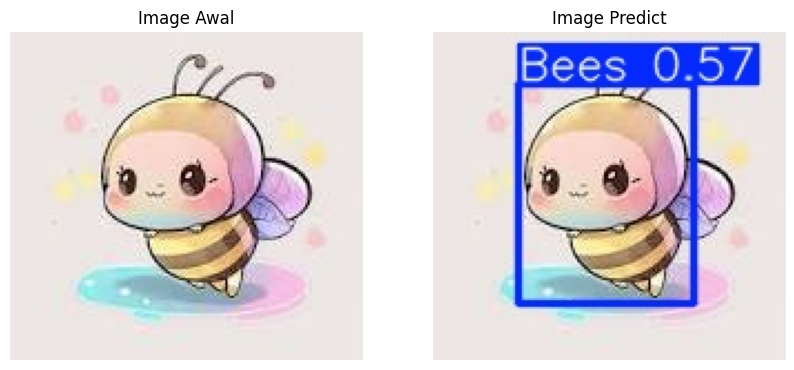

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the images
image1_path = '/content/example.jpg'
image2_path = '/content/runs/detect/predict/example.jpg'

# Open images using PIL
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Count number of detected bees
predicted_labels_path = '/content/runs/detect/predict/labels/example.txt'

# Read the predicted labels file to count bees
if os.path.exists(predicted_labels_path):
    with open(predicted_labels_path, 'r') as file:
        detected_bees = len(file.readlines())
else:
    detected_bees = 0

# Print the number of detected bees
print(f'Number of detected bees: {detected_bees}')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off axis labels
axes[0].set_title('Image Awal')

# Display the second image
axes[1].imshow(image2)
axes[1].axis('off')  # Turn off axis labels
axes[1].set_title('Image Predict')

# Show the plot
plt.show()
